In [4]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load training data
train_file = "dataset\Accelerometer.csv"  # Change to "magnetometer.csv" for magnetometer model
df = pd.read_csv(train_file)

# Feature columns (Modify if needed)
features = ["a_x", "a_y", "a_z"]  # For magnetometer, change to ["m_x", "m_y", "m_z"]

# Normalize Data
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)
model.fit(df[features])

# Save Model & Scaler
joblib.dump(model, "isolation_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model trained and saved successfully!")


Model trained and saved successfully!


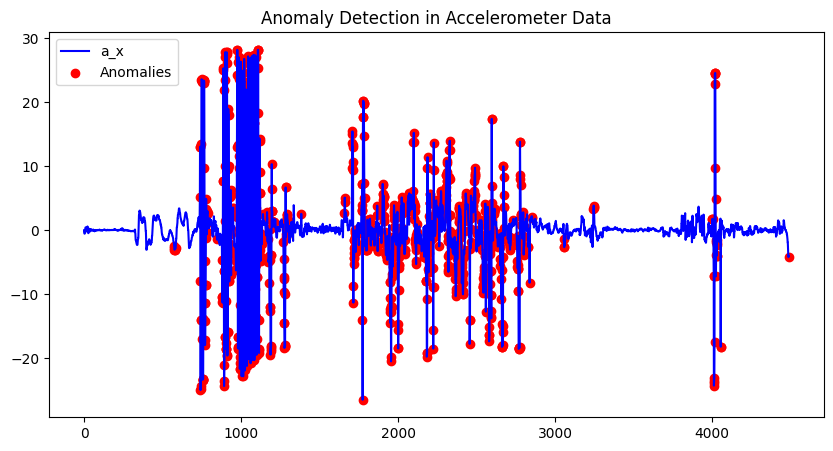

In [ ]:
## TEST MODEL ##

import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Load Model & Scaler
model = joblib.load("isolation_forest_model.pkl")
scaler = joblib.load("scaler.pkl")

# Load test data
test_file = "csv_files\Accelerometer.csv"  # Change for magnetometer
df = pd.read_csv(test_file)

# Normalize test data
features = ["a_x", "a_y", "a_z"]
df[features] = scaler.transform(df[features])

# Predict anomalies (-1 = anomaly, 1 = normal)
df["anomaly"] = model.predict(df[features])

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["a_x"], label="a_x", color="blue")
plt.scatter(df.index[df["anomaly"] == -1], df["a_x"][df["anomaly"] == -1], color="red", label="Anomalies")
plt.legend()
plt.title("Anomaly Detection in Accelerometer Data")
plt.show()


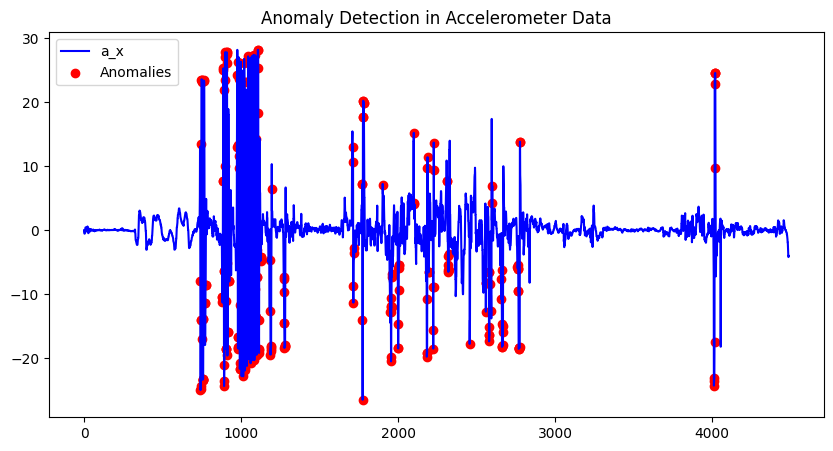

In [7]:

import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Load Model & Scaler
model = joblib.load("isolation_forest_model.pkl")
scaler = joblib.load("scaler.pkl")

# Load test data
test_file = "test_csv_files\Accelerometer.csv"  # Change for magnetometer
df = pd.read_csv(test_file)

# Normalize test data
features = ["a_x", "a_y", "a_z"]
df[features] = scaler.transform(df[features])

# Predict anomalies (-1 = anomaly, 1 = normal)
df["anomaly"] = model.predict(df[features])

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["a_x"], label="a_x", color="blue")
plt.scatter(df.index[df["anomaly"] == -1], df["a_x"][df["anomaly"] == -1], color="red", label="Anomalies")
plt.legend()
plt.title("Anomaly Detection in Accelerometer Data")
plt.show()